In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

In [167]:
thera_df= pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [168]:
thera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [169]:
thera_df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [170]:
thera_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


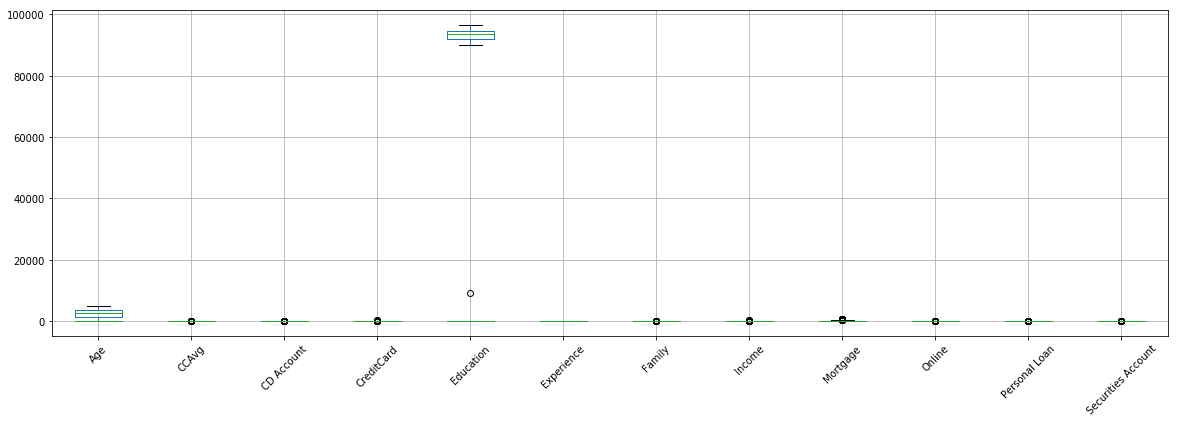

In [171]:
#pd.options.display.mpl_style='default'
thera_df.boxplot(rot=45, figsize=[20,6])
new_thera = thera_df[thera_df.columns.difference(['ZIP Code','ID'])]
new_thera.boxplot(rot=45, figsize=[20,6])

In [172]:
dfposExp = thera_df.loc[thera_df['Experience'] >0]
mask = thera_df.Experience < 0
column_name = 'Experience'
mylist = thera_df.loc[mask]['ID'].tolist()

In [173]:
for id in mylist:
    age = thera_df.loc[np.where(thera_df['ID']==id)]["Age"].tolist()[0]
    education = thera_df.loc[np.where(thera_df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfposExp[(dfposExp.Age == age) & (dfposExp.Education == education)]
    exp = df_filtered['Experience'].median()
    thera_df.loc[thera_df.loc[np.where(thera_df['ID']==id)].index, 'Experience'] = exp

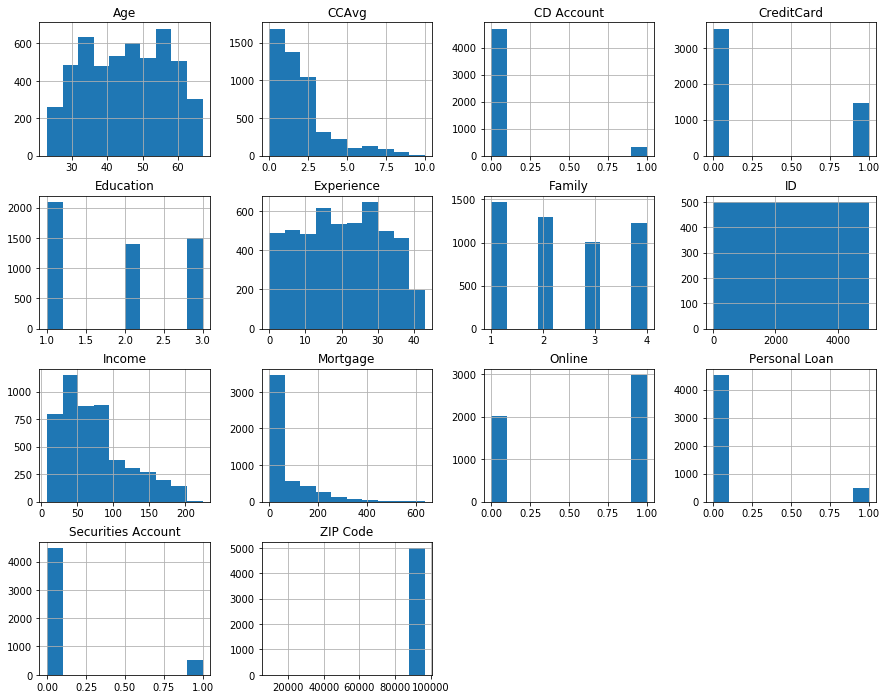

In [174]:
thera_df.hist(figsize=[15,12]);

# The below variables are the boolean: 
CD Account: A certificate of deposit is a savings certificate with maturity date and fixed interest rate etc
            0: user holds no CD account
            1: user holds CD account
            VEry less persons hold CD account
            
Credit card: holder are provided services with credit
            0: user holds no credit card
            1: user holds credit card
            Nearly half of the people hold Credit card
            
Online: user has access to netbanking, mobile banking or online apps
            0: user holds no online account
            1: user holds online account
            Online users are 25% more than non online users
            
Personal Loan: loan offered to user
            0: user holds no loan
            1: user holds loan
            Less than 10% have Personal loans
            
Securities Account: financial instrument like stocks, bonds etc
            0: user holds no securities account
            1: user holds securities account
            Less than 10% have this account
            
--------------------------------------------------------------------------

Education: Considering the discrete values (1,2,3), People with grade 1 are more than 2 and 3

            


E:\Anaconda\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\Anaconda\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

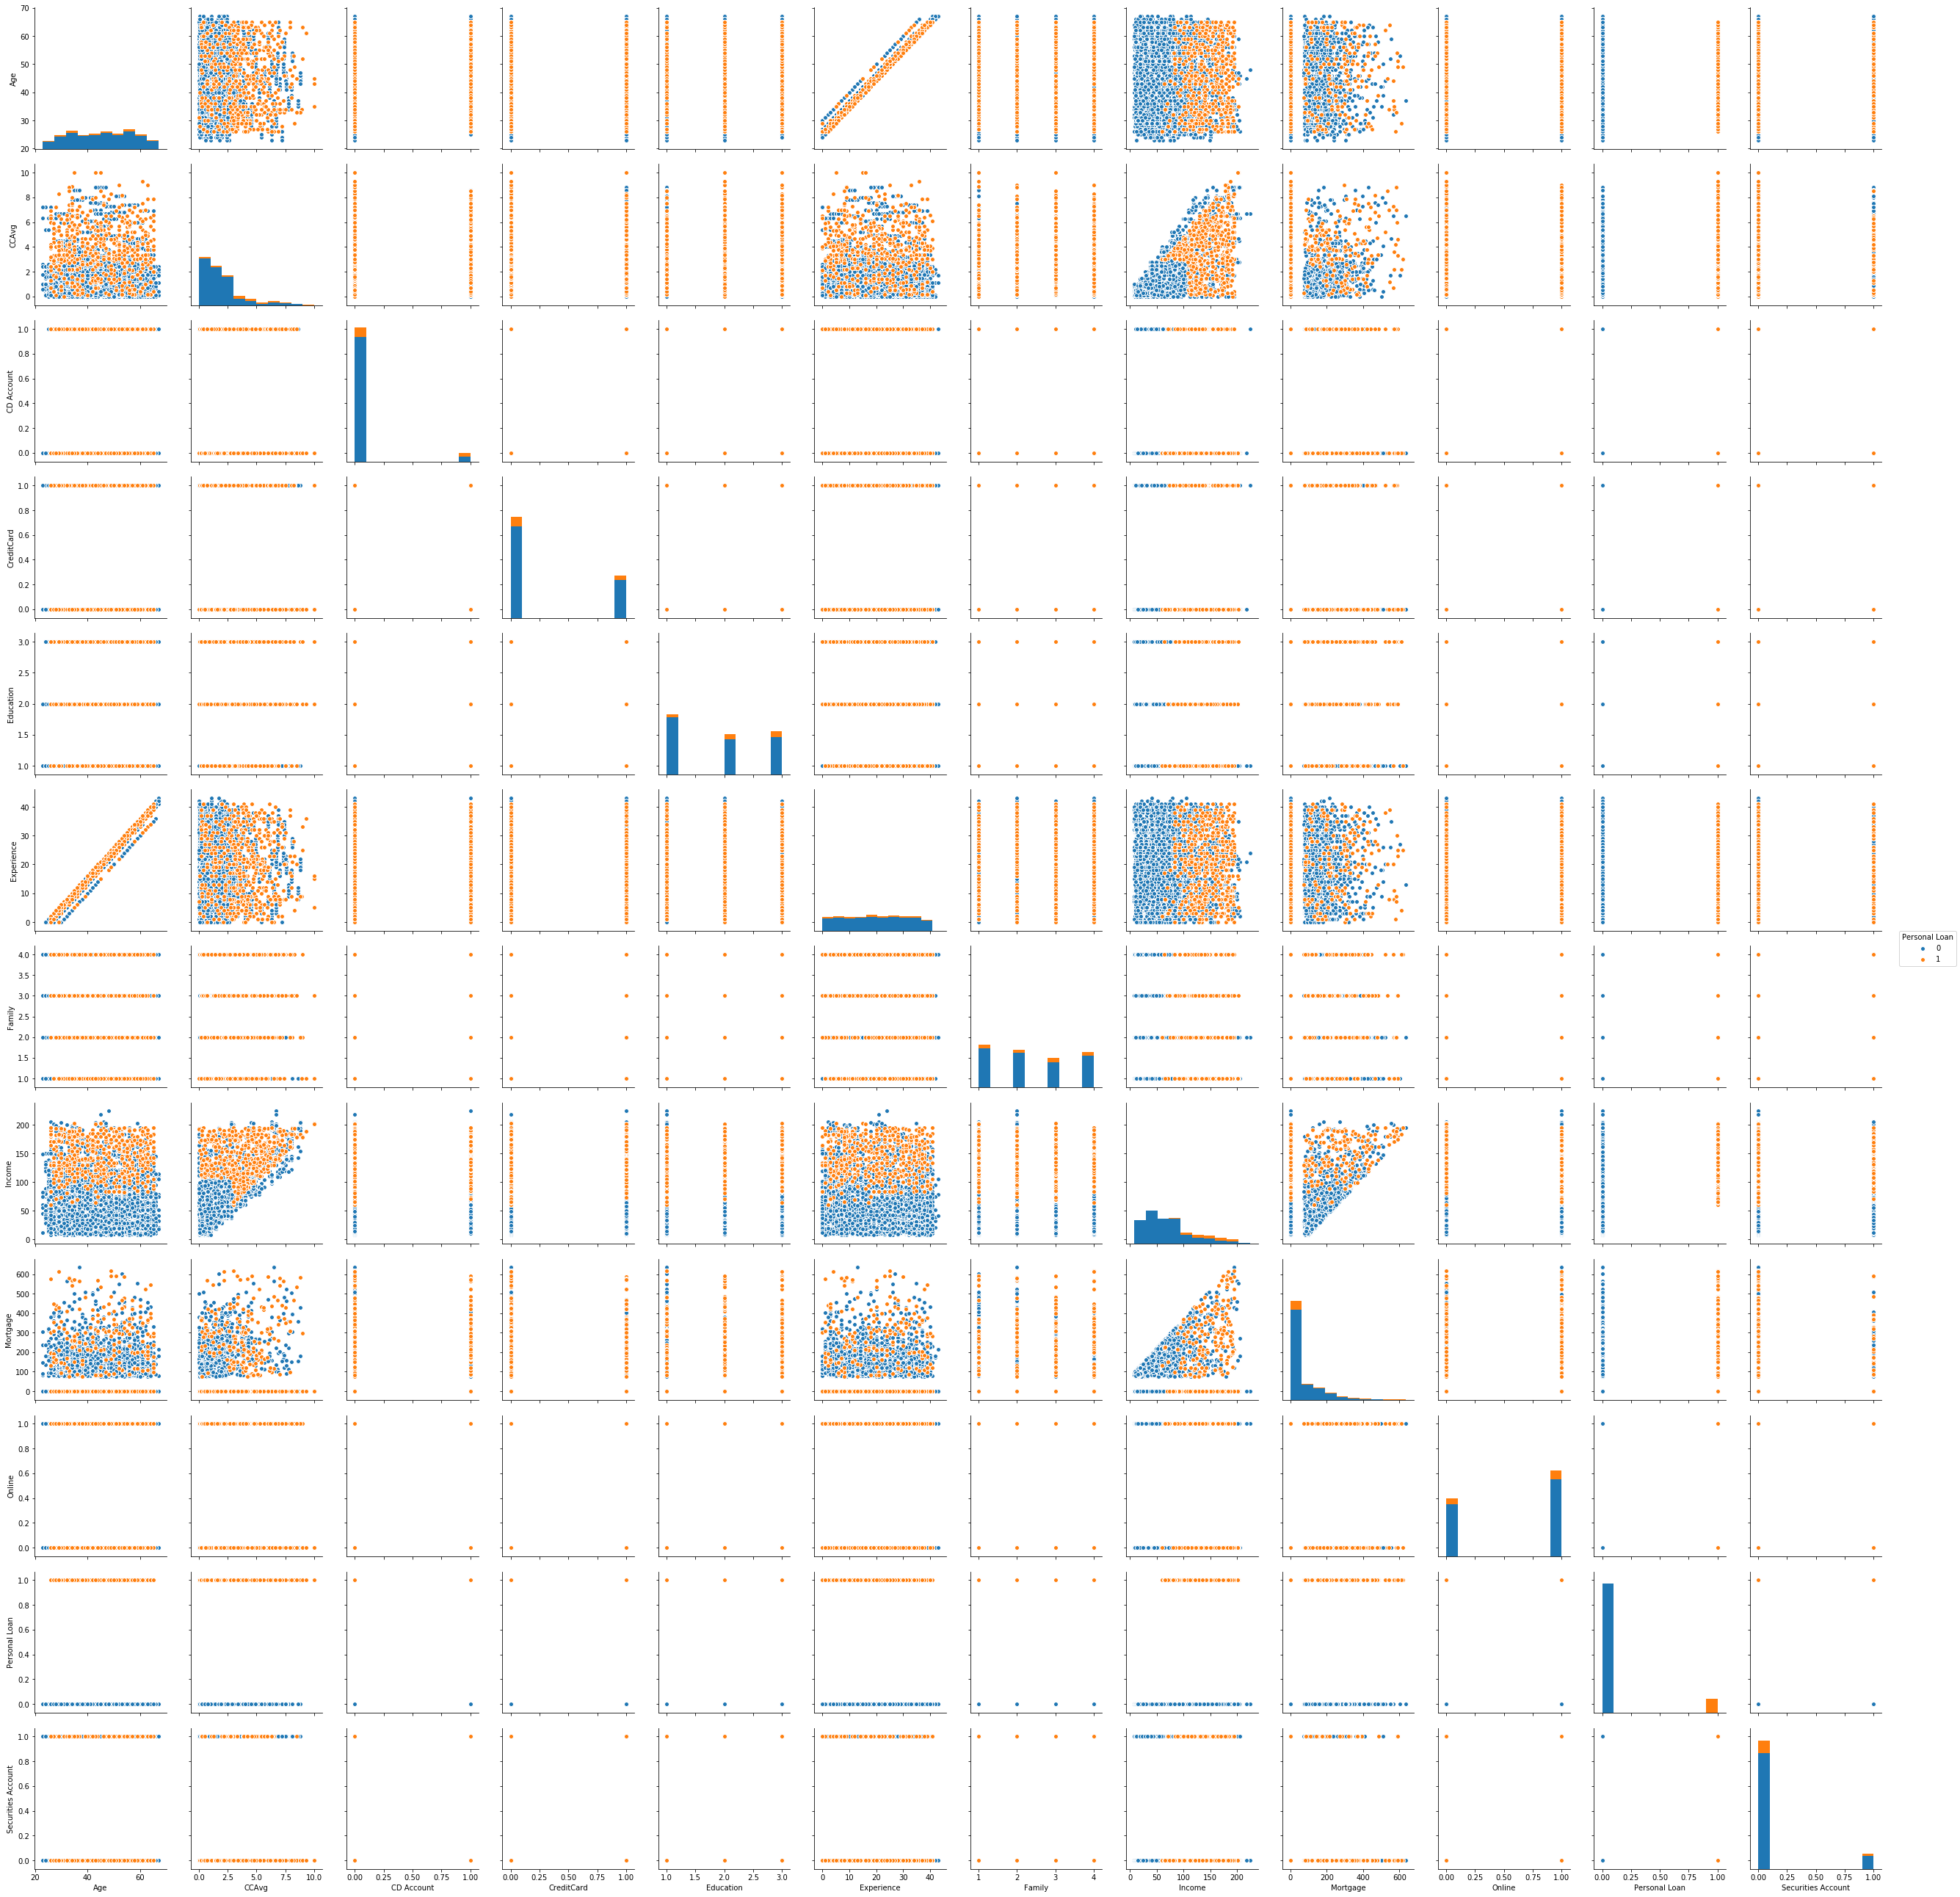

In [175]:
new_thera = thera_df[thera_df.columns.difference(['ZIP Code','ID'])]
fig=plt.figure()
sns_plot=sns.pairplot(new_thera, hue='Personal Loan', size=3)
sns_plot.savefig("sample.png")
#sns.pairplot(new_thera, hue='Personal Loan', size=3)

As income raises, the cash credit average (CC Avg) also raises.
As income raises, mortgage also raises.
People with lesser income are not holding Personal loans.

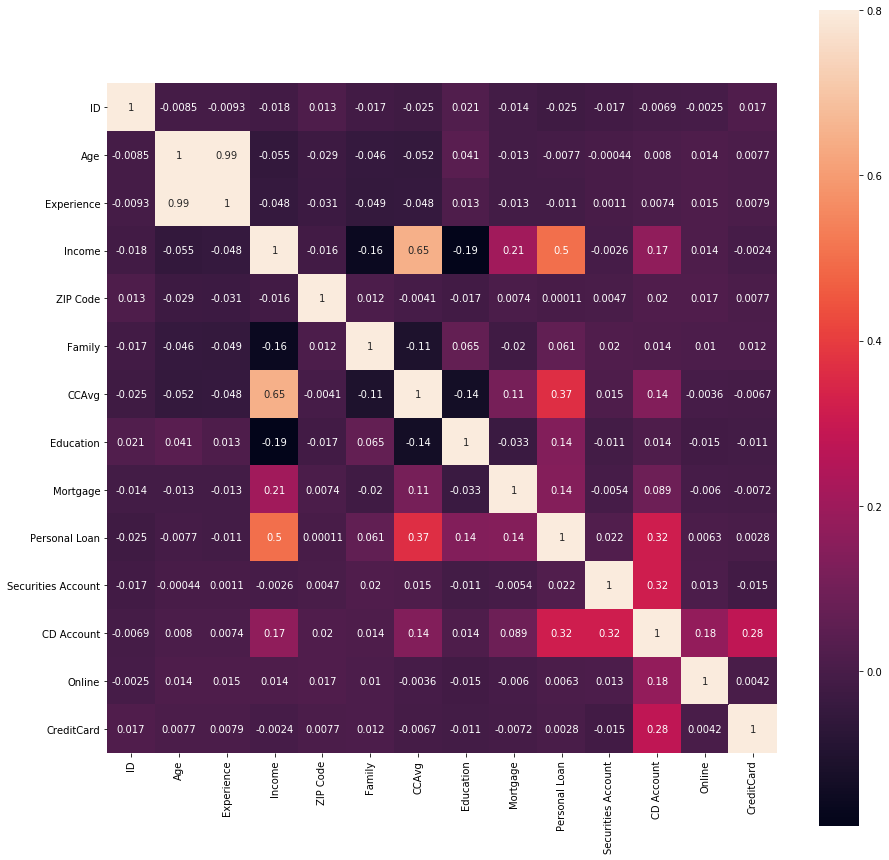

In [176]:
plt.figure(figsize=(15,15))
sns.heatmap(thera_df.corr(), annot=True, square=True, vmax=.8,)

In [177]:
logisticDF = thera_df

In [178]:
EducationCol = pd.get_dummies(logisticDF['Education'],drop_first=True,prefix='Education_')
SecAcc = pd.get_dummies(logisticDF['Securities Account'],drop_first=True,prefix='SecAcc_')
CdAcc = pd.get_dummies(logisticDF['CD Account'],drop_first=True,prefix='CDAcc_')
OnlineAcc = pd.get_dummies(logisticDF['Online'],drop_first=True,prefix='Online_')
cc = pd.get_dummies(logisticDF['CreditCard'],drop_first=True,prefix='cc_')
FamilyCol = pd.get_dummies(logisticDF['Family'],drop_first=True,prefix='Family_')

In [179]:
np.isnan(logisticDF.Experience).any()
logisticDF['Experience'].fillna(0, inplace=True)

In [180]:
np.isnan(logisticDF.Experience).any()

False

In [181]:
logisticDF.drop(['Education','Securities Account','CD Account','Online','CreditCard','Family','ID'],axis=1,inplace=True)

In [182]:
logisticDF = pd.concat([logisticDF,EducationCol,SecAcc,CdAcc,OnlineAcc,cc,FamilyCol],axis=1)
logisticDF.head()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Education__2,Education__3,SecAcc__1,CDAcc__1,Online__1,cc__1,Family__2,Family__3,Family__4
0,25,1.0,49,91107,1.6,0,0,0,0,1,0,0,0,0,0,1
1,45,19.0,34,90089,1.5,0,0,0,0,1,0,0,0,0,1,0
2,39,15.0,11,94720,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,9.0,100,94112,2.7,0,0,1,0,0,0,0,0,0,0,0
4,35,8.0,45,91330,1.0,0,0,1,0,0,0,0,1,0,0,1


In [183]:
# splitting data into training and test set for independent attributes
X =  logisticDF.drop("Personal Loan", axis=1)
Y =  logisticDF['Personal Loan']

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.30)

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
logmodel = LogisticRegression()
model = logmodel.fit(X_train,y_train)

In [186]:
predictions = logmodel.predict(X_test)

In [187]:
logmodel.score(X_test,y_test)

0.91

In [188]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1367
          1       0.49      0.35      0.41       133

avg / total       0.90      0.91      0.90      1500



In [189]:
confusion_matrix(y_test,predictions)

array([[1318,   49],
       [  86,   47]], dtype=int64)

True positive rate 36%

In [197]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_train, y_train)    
predicted = knn.predict(X_test)
acc = accuracy_score(y_test, predicted)

In [198]:
acc

0.9073333333333333

In [199]:
confusion_matrix(y_test,predicted)

array([[1355,   12],
       [ 127,    6]], dtype=int64)

 True positive rate is around 4.5 %

In [194]:
from sklearn.naive_bayes import GaussianNB

In [202]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

#prediction = naive_model.predict(X_test)
naive_model.score(X_test,y_test)

0.892

In [203]:
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      1367
          1       0.33      0.05      0.08       133

avg / total       0.86      0.91      0.87      1500

[[1355   12]
 [ 127    6]]


 True positive rate is around 4.5 %